# Week 5: ANOVA and Linear Regression
In our last module, we saw that we can numerically relate two variables--either by evaluating how and when they vary together (covariance) or how variation in one variable leads to variation in another (correlation). It's now time for us to start thinking about our variables from two perspectives:
1. We can determine how several categories of a variable relate to one another by comparing their subgroup averages with one another. This is called ANOVA. 
2. We can determine more than just the mere existence of a relationship--we can determine exactly how two variables relate to one another, in the form of y = f(x) + b where x is the independent variable and y the dependent variable. This format will allow us to derive a model from existing relationships and apply this model to future relationships. This is called linear modeling and regression.

In [1]:
# We are setting up the environment with all the packages we could possibly need
# For pandas documentation, see https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe
# For matplotlib documentation, see https://matplotlib.org/api/pyplot_summary.html

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
# Now let's import our data. We will, this time around, work not with the adult dataset, but with the Fuel Efficiency dataset/
# To review the attributes and their values, check out https://archive.ics.uci.edu/ml/datasets/auto+mpg  We are adding on a GPM (= gallons per 100 miles) variable to help us conduct our work more efficiently. This file is stored remotely.

FuelEff = pd.read_csv("http://www.biz.uiowa.edu/faculty/jledolter/datamining/FuelEfficiency.csv")
FuelEff.shape # Let's get the basic outline of the dataset

(38, 8)

In [49]:
# Alrighty, let's look at the data themselves
FuelEff.head()

,MPG,GPM,WT,DIS,NC,HP,ACC,ET
0,16.9,5.917,4.360,350,8,155,14.9,1
1,15.5,6.452,4.054,351,8,142,14.3,1
2,19.2,5.208,3.605,267,8,125,15.0,1
3,18.5,5.405,3.940,360,8,150,13.0,1
4,30.0,3.333,2.155,98,4,68,16.5,0


In [50]:
# And let's verify the datatypes before we go off into analysis land:
FuelEff.dtypes

MPG    float64
GPM    float64
WT     float64
DIS      int64
NC       int64
HP       int64
ACC    float64
ET       int64
dtype: object

## A little preprocessing
GPM (Gallons per 100 miles) and MPG (miles per gallon) are essentially the same thing. In the interest of intellectual flexibility and European car manufacturers who measure fuel efficiency in litres per kilometer, we will use GPM and remove MPG from the dataset.

In [51]:
FuelEff1 = FuelEff.drop(['MPG'], axis=1) # Remember that axis=1 is the column and axis=0 is the row.
FuelEff1.head()

,GPM,WT,DIS,NC,HP,ACC,ET
0,5.917,4.360,350,8,155,14.9,1
1,6.452,4.054,351,8,142,14.3,1
2,5.208,3.605,267,8,125,15.0,1
3,5.405,3.940,360,8,150,13.0,1
4,3.333,2.155,98,4,68,16.5,0


## Let's get a sense of how some of the independent variables relate to GPM

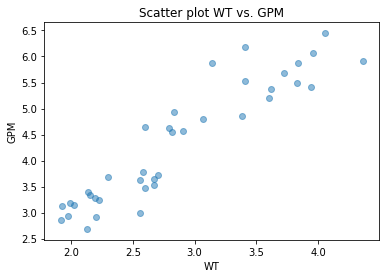

In [52]:
plt.scatter(FuelEff1['WT'], FuelEff1['GPM'], alpha=0.5)
plt.title('Scatter plot WT vs. GPM')
plt.xlabel('WT')
plt.ylabel('GPM')
plt.show()    # Yay. Looks like a pretty good positive correlation. 

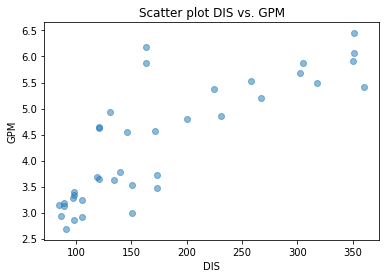

In [63]:
plt.scatter(FuelEff1['DIS'], FuelEff1['GPM'], alpha=0.5)
plt.title('Scatter plot DIS vs. GPM')
plt.xlabel('DIS')
plt.ylabel('GPM')
plt.show()    # Well, some sort of a positive correlation.

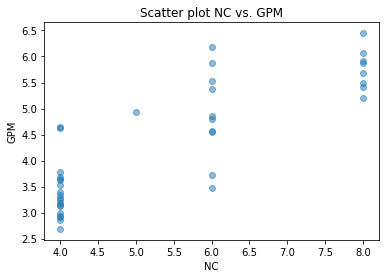

In [64]:
plt.scatter(FuelEff1['NC'], FuelEff1['GPM'], alpha=0.5)
plt.title('Scatter plot NC vs. GPM')
plt.xlabel('NC')
plt.ylabel('GPM')
plt.show()    # Huh. That output is interesting. See how the values for 6.0 cylinders overlap with 4.0 and 8.0?

The output from the last scatterplot is strange--if the GPM of a car with 6 cylinders overlaps that much with either 4 cylinders or 8 cylinders, what is the use of having a 6-cylinder car? We need to look more closely into this.

## 1. ANOVA
Analysis of variance (ANOVA) is used to test the variation between two known data groups by analyzing differences among group means. Here, we want to find out whether there is any difference in the means between the 6-cylinder car and its neighbors. 

The H0 in ANOVA is always that all group means are equal. 
The Ha in ANOVA is that at least one group mean is different.
The default p-value is 0.05

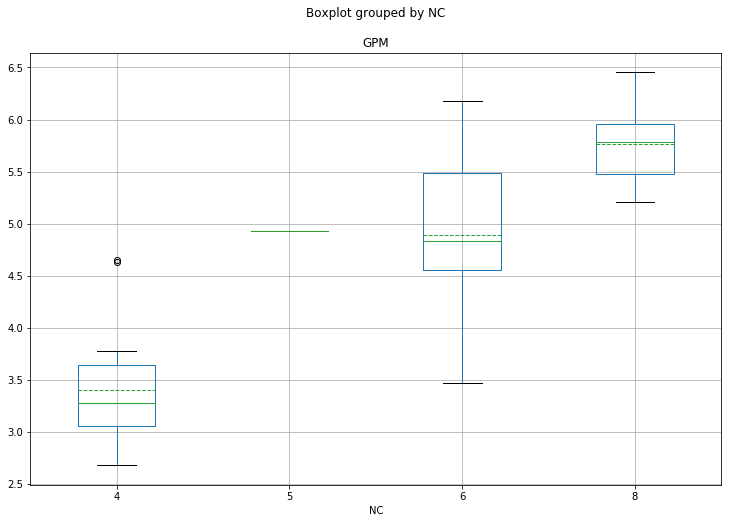

In [53]:
#Let's first create a boxplot of the NUmber of Cylinders vs the GPM
FuelEff1.boxplot('GPM', by='NC', figsize=(12, 8), meanline=True, showmeans=True)

As we can see here, it looks like the group means are different because the overlaps are mostly outliers. But can we prove that mathematically? In other words, does it make sense to buy a 4-cylinder car, and we can really expect to use less gas?

We will be using data science packages below; if you want to try calculating all the step in pure Python, you'll find a great example at https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [57]:
# 1. Using statsmodels, which is closer to the syntax we already know from R
# We start by using the OLS stands for Ordinary Least Squares and the method “Least Squares” means 
# that we’re trying to fit a linear model line that would minimize the square of distance from the regression line.
# The object obtained is a fitted model, which we first look at and that we later use with the anova_lm method to build an ANOVA table.
 
FuelEff1.anova1 = ols('GPM ~ NC', data=FuelEff1).fit()
print(FuelEff1.anova1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     87.12
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           3.79e-11
Time:                        13:16:22   Log-Likelihood:                -35.559
No. Observations:                  38   AIC:                             75.12
Df Residuals:                      36   BIC:                             78.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0581      0.365      2.896      0.0

Let’s interpret the table. Overall the model is representative with R-squared= 70%, significiant with F = 87.12, p = 3.79e-11. The anova table below will tell us a bit more.

In [58]:
aov_table = sm.stats.anova_lm(FuelEff1.anova1, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
NC,34.986839,1.0,87.117891,3.792596e-11
Residual,14.457722,36.0,NaN,NaN


Pr > F  is the p-value associated with the F statistic of a given effect and test statistic. The null hypothesis that a given predictor has no effect on either of the outcomes is evaluated with regard to this p-value. For a given alpha level, if the p-value is less than alpha, the null hypothesis is rejected.

PROBLEM: We have done the analysis by the entire NC attribute, but not by number of cylinders. How would you do that? Try and re-run the analysis!

## 2. Regression
We are building a linear regression model for the relationship between NC and GPM with the OLS Assumptions. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line. 

In [65]:
X = FuelEff1['NC']
y = FuelEff1['GPM']
FuelEff1.mod1 = sm.OLS(y, X).fit()
FuelEff1.mod1_summary = FuelEff1.mod1.summary()
FuelEff1.mod1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPM   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1545.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           8.85e-32
Time:                        06:21:33   Log-Likelihood:                -39.538
No. Observations:                  38   AIC:                             81.08
Df Residuals:                      37   BIC:                             82.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NC             0.7872      0.020     39.305      0.000       0.747       0.828
==============================================================================
Omnibus:                        0.618   Durbin-Watson:                   1.187
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.575
Skew:                           0.275   Prob(JB):                        0.750
Kurtosis:                       2.755   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of 0.7872 means that as the NC variable increases by 1, the predicted value of GPM increases by 0.7872. A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of RM is between 0.025 to 0.975).

Now let's take a look at the predicted values for x and then plot them:

In [85]:
# You can do this with predict() and with fittedvalues. Look up these commands and explain why they produce the same output.
predictions = FuelEff1.mod1.predict(X)
fittedvalues = FuelEff1.mod1.fittedvalues
print([predictions],[fittedvalues])

[0     6.297752
1     6.297752
2     6.297752
3     6.297752
4     3.148876
5     3.148876
6     3.148876
7     3.148876
8     3.936095
9     4.723314
10    3.148876
11    4.723314
12    4.723314
13    4.723314
14    4.723314
15    4.723314
16    6.297752
17    6.297752
18    6.297752
19    6.297752
20    3.148876
21    4.723314
22    3.148876
23    3.148876
24    3.148876
25    3.148876
26    3.148876
27    3.148876
28    4.723314
29    4.723314
30    3.148876
31    3.148876
32    3.148876
33    3.148876
34    3.148876
35    4.723314
36    3.148876
37    3.148876
dtype: float64] [0     6.297752
1     6.297752
2     6.297752
3     6.297752
4     3.148876
5     3.148876
6     3.148876
7     3.148876
8     3.936095
9     4.723314
10    3.148876
11    4.723314
12    4.723314
13    4.723314
14    4.723314
15    4.723314
16    6.297752
17    6.297752
18    6.297752
19    6.297752
20    3.148876
21    4.723314
22    3.148876
23    3.148876
24    3.148876
25    3.148876
26    3.148876
27    3

In [81]:
fittedvalues = print(FuelEff1.mod1.fittedvalues)
fittedvalues

0     6.297752
1     6.297752
2     6.297752
3     6.297752
4     3.148876
5     3.148876
6     3.148876
7     3.148876
8     3.936095
9     4.723314
10    3.148876
11    4.723314
12    4.723314
13    4.723314
14    4.723314
15    4.723314
16    6.297752
17    6.297752
18    6.297752
19    6.297752
20    3.148876
21    4.723314
22    3.148876
23    3.148876
24    3.148876
25    3.148876
26    3.148876
27    3.148876
28    4.723314
29    4.723314
30    3.148876
31    3.148876
32    3.148876
33    3.148876
34    3.148876
35    4.723314
36    3.148876
37    3.148876
dtype: float64


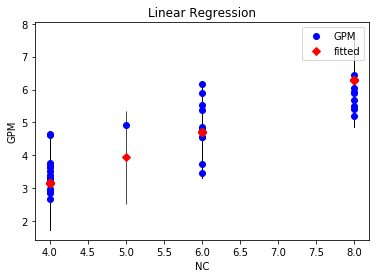

In [72]:
# Building the basic dot-and-line regression plot
results = FuelEff1.mod1
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("GPM")
ax.set_xlabel("NC")
ax.set_title("Linear Regression")
plt.show()

AttributeError: 'Series' object has no attribute 'design_info'

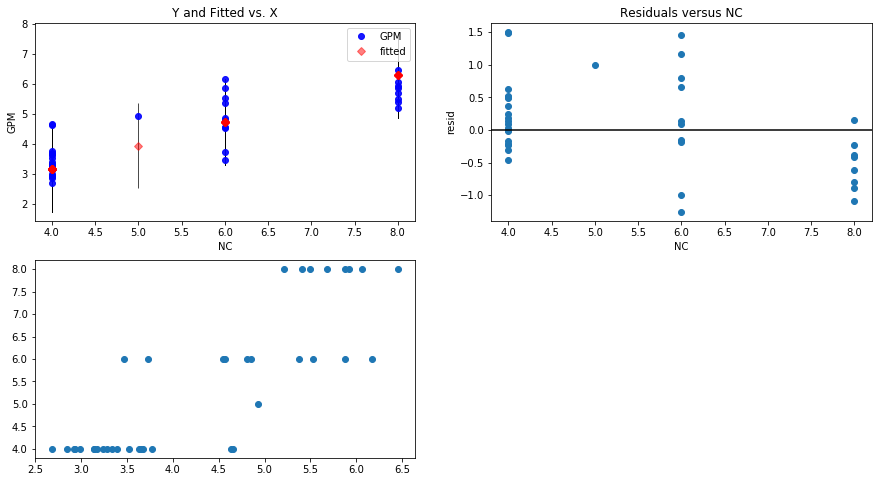

In [94]:
# Now let's build all four regression plots
fig = plt.figure(figsize=(15,8))

# Pass in the model as the first parameter, then specify the predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(FuelEff1.mod1, "NC", fig=fig) # This looks like an iPython bug
# fig = sm.graphics.plot_regress_exog(FuelEff1.mod1, "NC") 

The above was done with the statsmodels package; here is how to do it with sklearn's linear_model function

In [ ]:
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9